<a href="https://colab.research.google.com/github/TyrGunllod/TELECOMX_ML/blob/main/telecomx_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [36]:
# Importa as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Extração do arquivo tratado

In [44]:
# Carrega a base de dados
dados_base_tratado = pd.read_csv(
    "https://raw.githubusercontent.com/TyrGunllod/TELECOMX_ML/refs/heads/main/dados/telecomx_clean.csv"
)

# Encoding

In [43]:
# One-Hot Encoding nas variáveis categóricas
df_encoded = pd.get_dummies(
    dados_base_tratado,
    columns=["gender", "contract", "paymentmethod", "internetservice"],
    drop_first=True   # evita multicolinearidade
)

# Verificação da Proporção de Evasão

In [42]:
# Define X (features) e y (variável alvo)
X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

# Tratamento de valores ausentes com imputação
imputer = SimpleImputer(strategy="median")  # pode trocar para "mean" ou "most_frequent"
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Distribuição original
print("📊 Distribuição original:")
print(y.value_counts())
print(y.value_counts(normalize=True) * 100, "\n")

📊 Distribuição original:
churn
0    5174
1    1869
Name: count, dtype: int64
churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64 



# Balanceamento de Classes (opcional )

In [41]:
# UNDERSAMPLING
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print("🔽 Distribuição após UNDERSAMPLING:")
print(y_rus.value_counts())
print(y_rus.value_counts(normalize=True) * 100, "\n")

# OVERSAMPLING
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print("🔼 Distribuição após OVERSAMPLING:")
print(y_ros.value_counts())
print(y_ros.value_counts(normalize=True) * 100, "\n")

# SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_sm, y_sm = smote.fit_resample(X, y)
print("🤖 Distribuição após SMOTE:")
print(y_sm.value_counts())
print(y_sm.value_counts(normalize=True) * 100, "\n")

🔽 Distribuição após UNDERSAMPLING:
churn
0    1869
1    1869
Name: count, dtype: int64
churn
0    50.0
1    50.0
Name: proportion, dtype: float64 

🔼 Distribuição após OVERSAMPLING:
churn
0    5174
1    5174
Name: count, dtype: int64
churn
0    50.0
1    50.0
Name: proportion, dtype: float64 

🤖 Distribuição após SMOTE:
churn
0    5174
1    5174
Name: count, dtype: int64
churn
0    50.0
1    50.0
Name: proportion, dtype: float64 



# Análise de correlação

Ranking das variáveis mais correlacionadas com churn:
churn             1.000000
chargesmonthly    0.193356
contas_diarias    0.193356
seniorcitizen     0.150889
phoneservice      0.011942
partner          -0.150448
dependents       -0.164221
chargestotal     -0.199484
tenure           -0.352229
Name: churn, dtype: float64

Top 5 variáveis positivamente correlacionadas com churn:
chargesmonthly    0.193356
contas_diarias    0.193356
seniorcitizen     0.150889
phoneservice      0.011942
partner          -0.150448
Name: churn, dtype: float64

Top 5 variáveis negativamente correlacionadas com churn:
phoneservice    0.011942
partner        -0.150448
dependents     -0.164221
chargestotal   -0.199484
tenure         -0.352229
Name: churn, dtype: float64


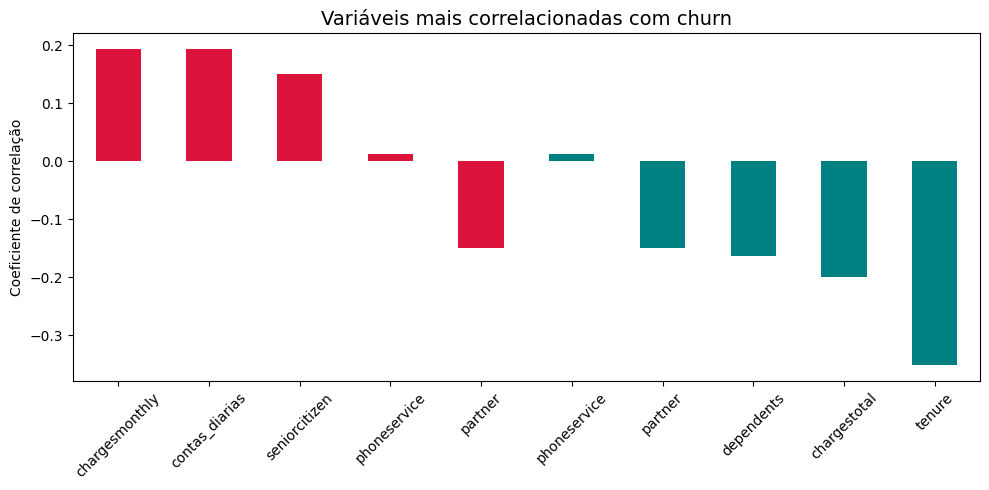

In [40]:
# Seleciona apenas colunas numéricas
df_corr = df_encoded.select_dtypes(include=["int64", "float64"])

# Calcula a matriz de correlação
corr_matrix = df_corr.corr()

# Ordena as variáveis pela correlação com churn
corr_target = corr_matrix["churn"].sort_values(ascending=False)

# Exibe ranking completo
print("Ranking das variáveis mais correlacionadas com churn:")
print(corr_target)

# Destaca as 5 maiores correlações positivas e negativas (excluindo churn)
top_pos = corr_target.drop("churn").head(5)
top_neg = corr_target.drop("churn").tail(5)

print("\nTop 5 variáveis positivamente correlacionadas com churn:")
print(top_pos)

print("\nTop 5 variáveis negativamente correlacionadas com churn:")
print(top_neg)

# Gráfico das top correlações (positivo e negativo)
top_corr = pd.concat([top_pos, top_neg])

plt.figure(figsize=(10,5))
top_corr.plot(kind="bar", color=["crimson"]*5 + ["teal"]*5)
plt.title("Variáveis mais correlacionadas com churn", fontsize=14)
plt.ylabel("Coeficiente de correlação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise direcionada

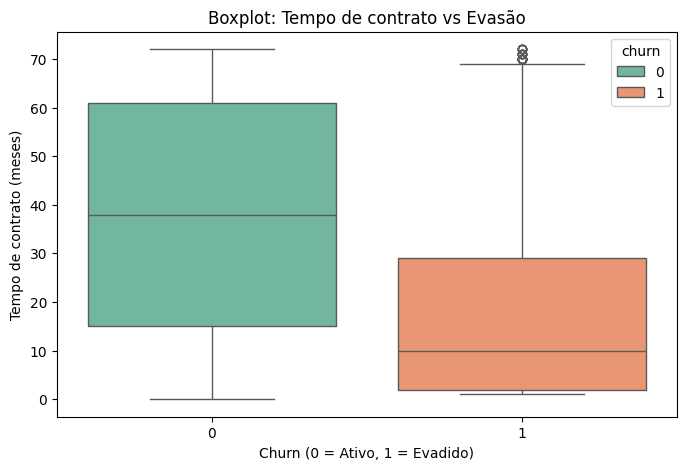

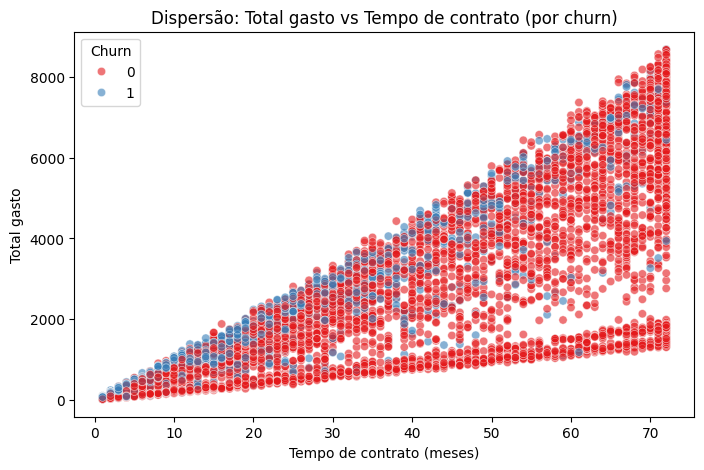

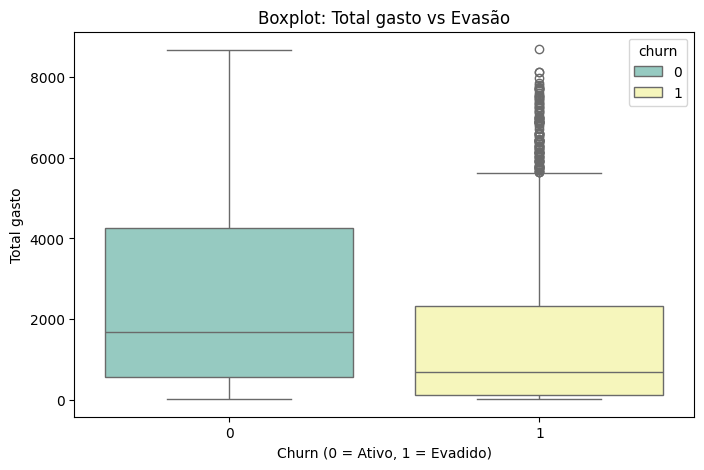

In [39]:
# Boxplot: Tempo de contrato vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="tenure", hue="churn", data=df_encoded, palette="Set2")
plt.title("Boxplot: Tempo de contrato vs Evasão")
plt.xlabel("Churn (0 = Ativo, 1 = Evadido)")
plt.ylabel("Tempo de contrato (meses)")
plt.show()

# Scatter plot: Total gasto vs Tempo de contrato, colorido por Churn
plt.figure(figsize=(8,5))
sns.scatterplot(x="tenure", y="chargestotal", hue="churn", data=df_encoded, palette="Set1", alpha=0.6)
plt.title("Dispersão: Total gasto vs Tempo de contrato (por churn)")
plt.xlabel("Tempo de contrato (meses)")
plt.ylabel("Total gasto")
plt.legend(title="Churn")
plt.show()

# Boxplot: Total gasto vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="chargestotal", hue="churn", data=df_encoded, palette="Set3")
plt.title("Boxplot: Total gasto vs Evasão")
plt.xlabel("Churn (0 = Ativo, 1 = Evadido)")
plt.ylabel("Total gasto")
plt.show()

# Separação de dados

In [28]:
# Variáveis de entrada (X) e alvo (y)
X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

# Opcional: imputação de valores ausentes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Divisão treino/teste: 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% dos dados para teste
    random_state=42,      # garante reprodutibilidade
    stratify=y            # mantém proporção de churn em treino e teste
)

# Exibe tamanho dos conjuntos
print("📌 Tamanho do conjunto de treino:", X_train.shape[0])
print("📌 Tamanho do conjunto de teste:", X_test.shape[0])

# Verifica proporção de churn nos conjuntos
print("\nDistribuição de churn no treino:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribuição de churn no teste:")
print(y_test.value_counts(normalize=True) * 100)


📌 Tamanho do conjunto de treino: 4930
📌 Tamanho do conjunto de teste: 2113

Distribuição de churn no treino:
churn
0    73.46856
1    26.53144
Name: proportion, dtype: float64

Distribuição de churn no teste:
churn
0    73.450071
1    26.549929
Name: proportion, dtype: float64


# Avaliação dos modelos

Modelo 1: Regressão Logística (Requer normalização)
Justificativa:

Regressão Logística é um modelo baseado em gradientes, ou seja, otimiza coeficientes usando métodos numéricos que são sensíveis à escala dos dados.

Se as variáveis tiverem escalas muito diferentes (ex.: tenure em meses vs chargestotal em reais), variáveis com valores maiores podem dominar o aprendizado.

Portanto, necessário aplicar padronização antes de treinar.

In [30]:
# Pipeline: padronização + modelo
pipeline_logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(random_state=42, class_weight="balanced"))
])

# Treina o modelo
pipeline_logreg.fit(X_train, y_train)

# Previsões
y_pred_logreg = pipeline_logreg.predict(X_test)

# Avaliação
print("📊 Regressão Logística:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


📊 Regressão Logística:
[[1095  457]
 [ 108  453]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1552
           1       0.50      0.81      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.71      2113
weighted avg       0.80      0.73      0.75      2113



Modelo 2: Random Forest (Não requer normalização)
Justificativa:

Random Forest é baseado em árvores de decisão, que não dependem da escala das variáveis.

Ele aprende thresholds e critérios de divisão de cada feature, portanto não é necessário padronizar os dados.

Além disso, é robusto a outliers e pode capturar relações não-lineares entre variáveis.

In [32]:
# Cria o modelo
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100)

# Treina o modelo
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação
print("📊 Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📊 Random Forest:
[[1380  172]
 [ 285  276]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.49      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



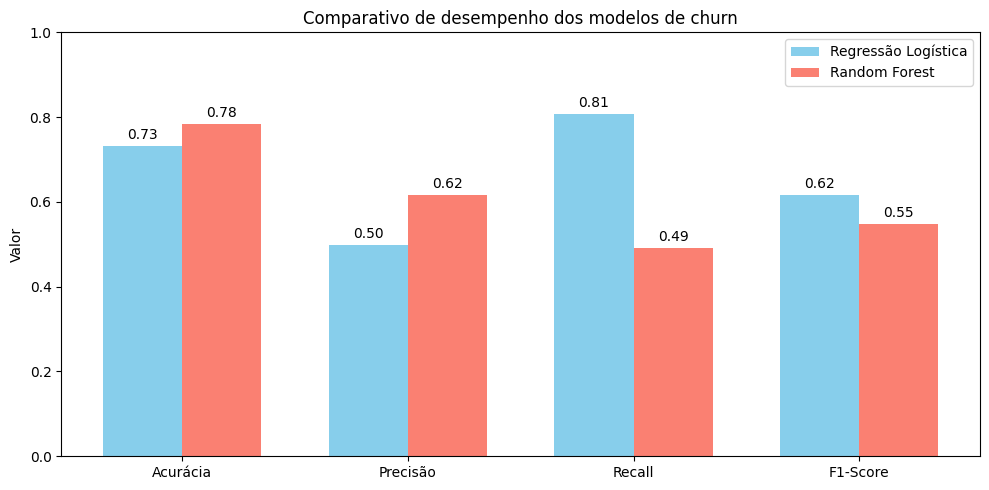

In [38]:
# Calcula métricas para cada modelo
metrics = {
    "Regressão Logística": [
        accuracy_score(y_test, y_pred_logreg),
        precision_score(y_test, y_pred_logreg),
        recall_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_logreg)
    ],
    "Random Forest": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ]
}

metric_names = ["Acurácia", "Precisão", "Recall", "F1-Score"]

# Prepara dados para gráfico
labels = metric_names
logreg_values = metrics["Regressão Logística"]
rf_values = metrics["Random Forest"]

x = np.arange(len(labels))  # posição das métricas
width = 0.35  # largura das barras

# Cria gráfico comparativo
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, logreg_values, width, label='Regressão Logística', color='skyblue')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='salmon')

# Adiciona labels e título
ax.set_ylabel("Valor")
ax.set_title("Comparativo de desempenho dos modelos de churn")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,1)

# Adiciona os valores no topo das barras
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # deslocamento
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


| Modelo              | Requer normalização? | Justificativa                                                            |
| ------------------- | -------------------- | ------------------------------------------------------------------------ |
| Regressão Logística | Sim                  | Baseado em gradiente; sensível à escala                                  |
| Random Forest       | Não                  | Baseado em árvores; não sensível à escala, captura relações não-lineares |


# Análise de Importância das Variáveis

Regressão Logística: análise dos coeficientes

Os coeficientes da regressão logística indicam o efeito de cada variável sobre a probabilidade de churn:

Coeficiente positivo → aumento da variável aumenta a chance de churn.

Coeficiente negativo → aumento da variável diminui a chance de churn.

Magnitude maior → variável tem maior impacto.

In [45]:
# Obtem os coeficientes do modelo
coefs = pipeline_logreg.named_steps["model"].coef_[0]

# Cria DataFrame com variáveis e coeficientes
coef_df = pd.DataFrame({
    "Variável": X_train.columns,
    "Coeficiente": coefs
})

# Ordena por magnitude absoluta para ver as mais impactantes
coef_df["abs_coef"] = np.abs(coef_df["Coeficiente"])
coef_df = coef_df.sort_values(by="abs_coef", ascending=False)

print("📌 Variáveis mais relevantes na Regressão Logística:")
print(coef_df[["Variável", "Coeficiente"]].head(10))


📌 Variáveis mais relevantes na Regressão Logística:
                          Variável  Coeficiente
2                           tenure    -1.331751
10               contract_two_year    -0.681194
1                     chargestotal     0.610632
14     internetservice_fiber_optic     0.418984
9                contract_one_year    -0.350255
12  paymentmethod_electronic_check     0.221810
15              internetservice_no    -0.214586
6                     phoneservice    -0.181105
3                       dependents    -0.111595
4                    seniorcitizen     0.100124


Random Forest: importância das variáveis

O Random Forest fornece a importância das variáveis com base na redução da impureza (Gini ou Entropia) nas divisões das árvores:

📌 Variáveis mais relevantes no Random Forest:
                          Variável  Importância
1                     chargestotal     0.194907
2                           tenure     0.165827
0                   chargesmonthly     0.153269
7                   contas_diarias     0.152990
10               contract_two_year     0.072883
14     internetservice_fiber_optic     0.045268
12  paymentmethod_electronic_check     0.044742
9                contract_one_year     0.038892
8                      gender_male     0.024013
15              internetservice_no     0.020067


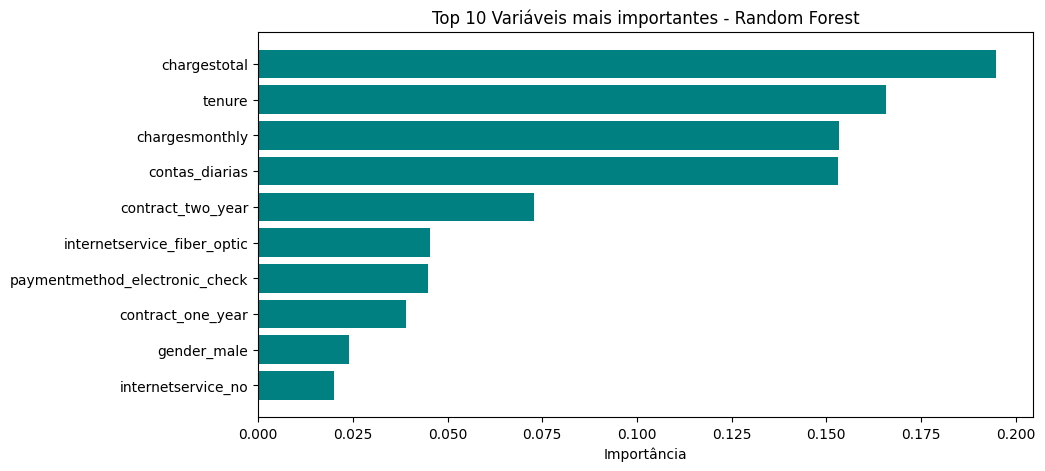

In [46]:
# Obtem a importância das variáveis
importances = rf_model.feature_importances_

# Cria DataFrame
rf_importance_df = pd.DataFrame({
    "Variável": X_train.columns,
    "Importância": importances
})

# Ordena do mais importante para o menos importante
rf_importance_df = rf_importance_df.sort_values(by="Importância", ascending=False)

print("📌 Variáveis mais relevantes no Random Forest:")
print(rf_importance_df.head(10))

# Gráfico das top 10 variáveis
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(rf_importance_df["Variável"].head(10)[::-1], rf_importance_df["Importância"].head(10)[::-1], color="teal")
plt.title("Top 10 Variáveis mais importantes - Random Forest")
plt.xlabel("Importância")
plt.show()